In [4]:
from definitions import ROOT_DIR
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

### Load Data from disc 

In [5]:
paths_to_dict = [

    'priors/test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String250__Endgame__.json',
    'priors/test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String125__Endgame__.json',
    'priors/test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String50__Endgame__.json',
    'priors/test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String5__Endgame__.json',
    'priors/test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_Stringsupervised__Endgame__.json',
    'priors/test_model__neural_net__data_grammar_8_run_1__MeasurementEncoderDummy__Transformer_Encoder_Stringsupervised__Endgame__.json',
        'priors/test_model__uniform.json',
    #'priors/test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__EquationEncoderDummysupervised__Endgame__.json',
    #'priors/test_model_token__neural_net__data_grammar_8_run_1__DatasetTransformer__Transformer_Encoder_Stringsupervised__Endgame__.json'
]
y_axis_label = {
    'test_model__uniform': 'uniform',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String250__Endgame__': '250 Bi LSTM',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String125__Endgame__': '125 Bi LSTM',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String50__Endgame__': '50 Bi LSTM',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String5__Endgame__': '5 Bi LSTM',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_Stringsupervised__Endgame__': 'supervised \n Bi LSTM',
    'test_model__neural_net__data_grammar_8_run_1__MeasurementEncoderDummy__Transformer_Encoder_Stringsupervised__Endgame__': 'supervised \n No Dataset',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__EquationEncoderDummysupervised__Endgame__': 'supervised \n  Bi LSTM \n No Syntax Tree ',
    #'test_model_token__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement__Transformer_Encoder_Stringsupervised__Endgame__': 'Token_Supervised NPT',
}
priors_dict = {}
for path in paths_to_dict:
    with open(ROOT_DIR / path, 'r') as file:
        loaded_data = json.load(file)
        priors_dict[Path(path).stem] = loaded_data

### visualize prediction

/tmp/ipykernel_23752/610206447.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_23752/610206447.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_23752/610206447.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_23752/610206447.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_23752/610206447.py:38: UserWarning: set_ticklabel

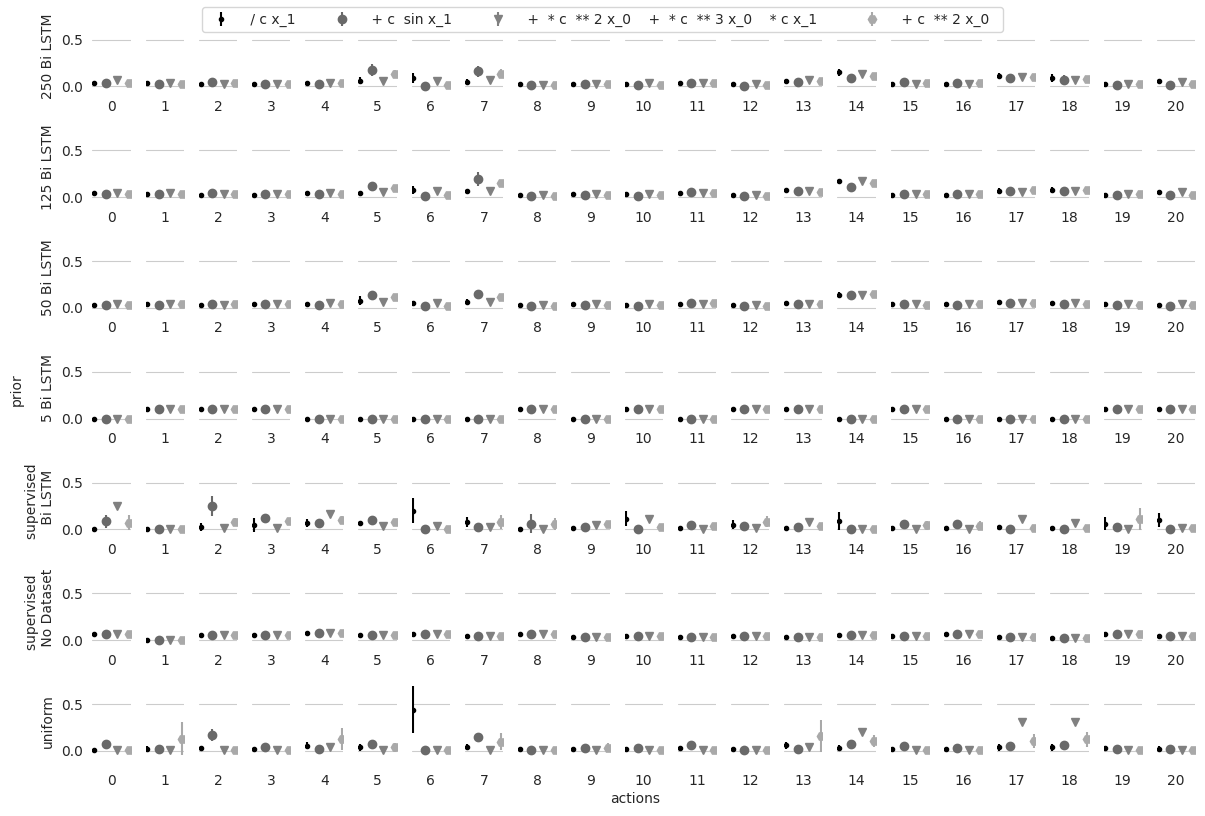

In [8]:
fig, axs = plt.subplots(len(paths_to_dict), 21, figsize=(12, len(paths_to_dict)  + 1), sharey=True, sharex=True)
equations = [
    ' / c x_1 ',
    ' + c  sin x_1 ',
    ' +  * c  ** 2 x_0    +  * c  ** 3 x_0    * c x_1   ',
    ' + c  ** 2 x_0  ',

]
for row, architecture in enumerate(priors_dict):
    for action in range(21):
        prior_mean = []
        prior_std = []
        for equation in equations:
            keys = list(priors_dict[architecture][equation].keys())
            prior = []
            for key in keys:
                prior.append(priors_dict[architecture][equation][key][action])
            prior_mean.append(np.mean(prior))
            prior_std.append(np.std(prior))
        # axs[row, action].bar(x=range(len(equations)),
        #                      height=prior_mean,
        #                      color=sns.color_palette("BuGn", len(equations)),
        #                      label=equations
        #                      )
        for i in range(len(equations)):
            axs[row, action].errorbar(x=i, #range(len(equations)),
                                      y=prior_mean[i],
                                      yerr=prior_std[i],
                                      fmt=['.', 'o', 'v', 'H'][i],
                                      ls='none',
                                      color= ['black', 'dimgrey', 'gray', 'darkgrey',][i],
                                      #c=sns.color_palette("BuGn", len(equations)),
                                      #capsize=5,
                                       label=equations[i]
                                      )

        x_tick_labels = axs[row, action].get_xticklabels()
        axs[row, action].set_xticklabels(['' for label in x_tick_labels])
        axs[row, action].set_xlabel(action)
        if action == 0:
            axs[row, action].set_ylabel(y_axis_label[architecture])
        axs[row, action].grid(visible=False, axis='x', which='both')
        axs[row, action].spines['top'].set_visible(False)
        axs[row, action].spines['right'].set_visible(False)
        axs[row, action].spines['bottom'].set_visible(False)
        axs[row, action].spines['left'].set_visible(False)
fig.text(0.5, 0, 'actions')
fig.text(0, 0.5, 'prior', rotation=90)
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5)
fig.tight_layout()
fig.savefig('priors.pdf')
plt.show()
        
